In [19]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
train_data = pd.read_csv("train.csv")
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

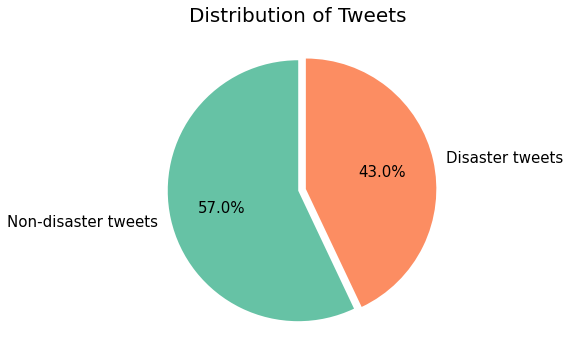

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

train_data.groupby('target').size().plot(kind='pie', labels=['Non-disaster tweets', 'Disaster tweets'], colors=sns.color_palette('Set2'), autopct='%1.1f%%',
                                   figsize=(6,6), explode=[0,0.06], textprops={'fontsize': 15}, startangle=90)


plt.ylabel('')
plt.title("Distribution of Tweets", fontsize=20)
plt.show()

In [17]:
length=0
for tweet in train_data.text:
    length+=len(tweet)
length

769198

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm


stop = stopwords.words('english') 

length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words before applying stop words: ", length)

for item,tweet in tqdm(enumerate(train_data.text)): 
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [token for token in tokens if token not in stop]
    train_data.text[item] =  " ".join(word for word in tokens)
    
length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words after applying stop words: ", length)

135it [00:00, 1341.47it/s]

Length of all words before applying stop words:  769198


7613it [00:08, 860.72it/s] 

Length of all words after applying stop words:  665775


In [25]:
train_data.text.head(20)

0        deeds reason # earthquake may allah forgive us
1               forest fire near la ronge sask . canada
2     residents asked 'shelter place ' notified offi...
3     13,000 people receive # wildfires evacuation o...
4     got sent photo ruby # alaska smoke # wildfires...
5     # rockyfire update = > california hwy . 20 clo...
6     # flood # disaster heavy rain causes flash flo...
7                        'm top hill see fire woods ...
8     's emergency evacuation happening building acr...
9                     'm afraid tornado coming area ...
10                      three people died heat wave far
11    haha south tampa getting flooded hah- wait sec...
12    # raining # flooding # florida # tampabay # ta...
13                  # flood bago myanmar # arrived bago
14      damage school bus 80 multi car crash # breaking
15                                             's man ?
16                                          love fruits
17                                        summer

In [26]:
import re

length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words before filtering out punctuation: ", length)

for item,tweet in tqdm(enumerate(train_data.text)): 
    tweet = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", tweet)
    train_data.text[item] =  tweet
    
length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words after filtering out punctuation: ", length)

126it [00:00, 1258.27it/s]

Length of all words before filtering out punctuation:  665775


7613it [00:05, 1371.09it/s]

Length of all words after filtering out punctuation:  587728


In [27]:
train_data.text.head(20)

0         deeds reason  earthquake may allah forgive us
1                forest fire near la ronge sask  canada
2     residents asked shelter place  notified office...
3     13000 people receive  wildfires evacuation ord...
4     got sent photo ruby  alaska smoke  wildfires p...
5      rockyfire update   california hwy  20 closed ...
6      flood  disaster heavy rain causes flash flood...
7                            m top hill see fire woods 
8     s emergency evacuation happening building acro...
9                         m afraid tornado coming area 
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12     raining  flooding  florida  tampabay  tampa 1...
13                     flood bago myanmar  arrived bago
14       damage school bus 80 multi car crash  breaking
15                                               s man 
16                                          love fruits
17                                        summer

In [28]:
length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words before removing numerical text and words with size less than 2: ", length)

for item,tweet in tqdm(enumerate(train_data.text)): 
    tokens = word_tokenize(tweet)
    tokens = [token for token in tokens if token.isalpha() and len(token)>2]
    train_data.text[item] =  " ".join(word for word in tokens)
    
length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words after removing numerical text and words with size less than 2: ", length)

214it [00:00, 1064.34it/s]

Length of all words before removing numerical text and words with size less than 2:  587728


7613it [00:06, 1121.57it/s]

Length of all words after removing numerical text and words with size less than 2:  477777


In [29]:
train_data.text.head(20)

0             deeds reason earthquake may allah forgive
1                    forest fire near ronge sask canada
2     residents asked shelter place notified officer...
3     people receive wildfires evacuation orders cal...
4     got sent photo ruby alaska smoke wildfires pou...
5     rockyfire update california hwy closed directi...
6     flood disaster heavy rain causes flash floodin...
7                               top hill see fire woods
8     emergency evacuation happening building across...
9                            afraid tornado coming area
10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa days l...
13                      flood bago myanmar arrived bago
14           damage school bus multi car crash breaking
15                                                  man
16                                          love fruits
17                                        summer

In [30]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words before applying lematization: ", length)

for item,tweet in tqdm(enumerate(train_data.text)): 
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    train_data.text[item] =  " ".join(word for word in tokens)
    
length=0
for tweet in train_data.text:
    length+=len(tweet)
print("Length of all words after applying lemmatization: ", length)

0it [00:00, ?it/s]

Length of all words before applying lematization:  477777


7613it [00:09, 767.90it/s] 

Length of all words after applying lemmatization:  458556


In [33]:
train_data.text.head(20)

0             deeds reason earthquake may allah forgive
1                    forest fire near ronge sask canada
2     residents ask shelter place notify officer eva...
3     people receive wildfires evacuation order cali...
4     get send photo ruby alaska smoke wildfires pou...
5     rockyfire update california hwy close directio...
6     flood disaster heavy rain cause flash flood st...
7                               top hill see fire woods
8       emergency evacuation happen build across street
9                              afraid tornado come area
10                       three people die heat wave far
11    haha south tampa get flood hah wait second liv...
12    rain flood florida tampabay tampa days lose count
13                       flood bago myanmar arrive bago
14              damage school bus multi car crash break
15                                                  man
16                                           love fruit
17                                        summer

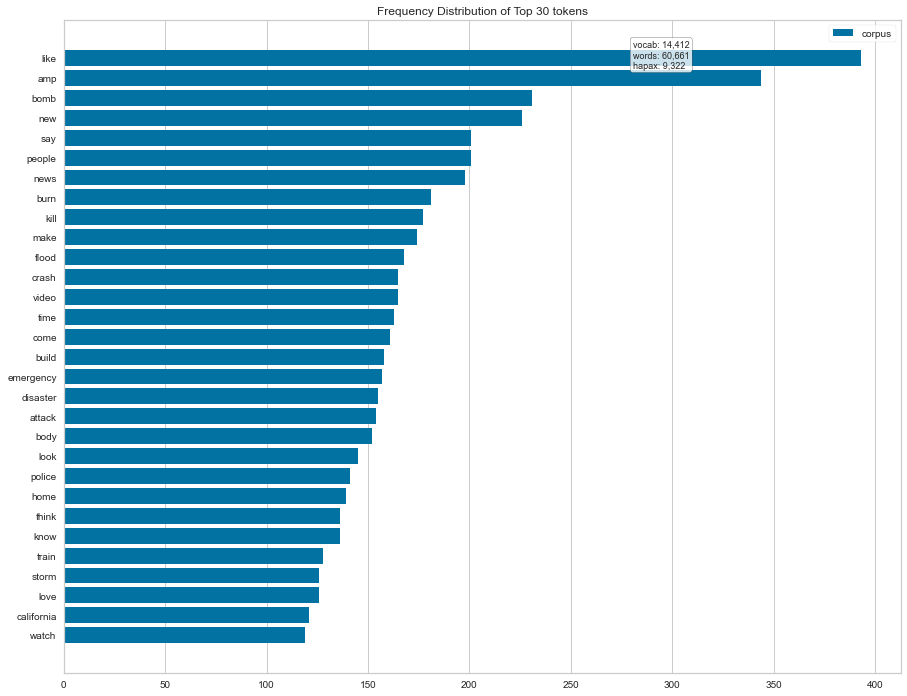

<AxesSubplot: title={'center': 'Frequency Distribution of Top 30 tokens'}>

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer

vect = CountVectorizer(stop_words='english')
X = vect.fit_transform(train_data.text)

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(15,12))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()